In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
import cmath

In [2]:
def m_unwrap(x):
    if x >= 0:
        return x
    else:
        return 360 + x

20sept - TE

29sept - TM

In [3]:
list_of_angles = [0, 15, 30, 45]
list_of_modes = ['TE', 'TM']
first_app = True

for angle in list_of_angles:
    for mode in list_of_modes:
        file = str(angle) + 'deg_' + mode + '.csv'

        temp = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\phase_diff\\'+file,
                           sep=',', skiprows=1, header=None, index_col=False, names=['Frequency', 'G_'+str(angle)+mode])
        temp['G_'+str(angle)+mode] = temp['G_'+str(angle)+mode].apply(complex)
        #print(temp.info())
        if angle==0 and mode=='TE':
            data_0TE = temp
        else:
            if first_app:
                data = temp
                first_app = False
            else:
                data = data.merge(temp, how='outer', on='Frequency')

In [4]:
data.head()

,Frequency,G_0TM,G_15TE,G_15TM,G_30TE,G_30TM,G_45TE,G_45TM
0,2.000000e+10,0.735941+0.587498j,0.861994+0.523801j,0.887429+0.453877j,0.893326+0.445816j,0.878377+0.475978j,0.903839+0.389142j,0.974834+0.328035j
1,2.000200e+10,0.737978+0.588848j,0.862463+0.523568j,0.887057+0.454245j,0.893718+0.445575j,0.878004+0.476343j,0.904136+0.389063j,0.974477+0.328407j
2,2.000400e+10,0.740006+0.590169j,0.862919+0.523333j,0.886699+0.454627j,0.894097+0.445334j,0.877642+0.476725j,0.904423+0.388982j,0.974132+0.328798j
3,2.000600e+10,0.742026+0.591462j,0.863361+0.523096j,0.886354+0.455025j,0.894463+0.445092j,0.877289+0.477122j,0.904699+0.388900j,0.973798+0.329208j
4,2.000800e+10,0.744038+0.592726j,0.863790+0.522858j,0.886024+0.455437j,0.894816+0.444850j,0.876947+0.477536j,0.904966+0.388817j,0.973475+0.329638j


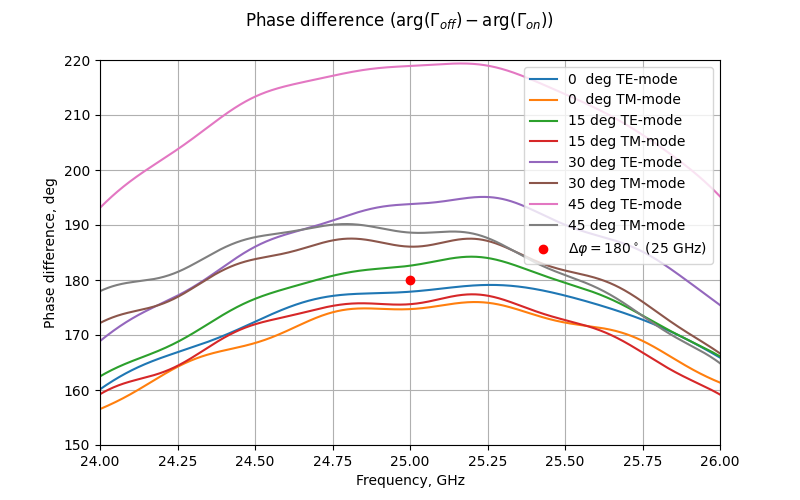

In [21]:
fig2 = plt.figure(figsize=(8,5))

ax_1 = fig2.add_subplot(111)
for angle in list_of_angles:
    for mode in list_of_modes:
        if angle==0 and mode=='TE':
            ax_1.plot(data_0TE['Frequency']*1e-9, (np.degrees((data_0TE['G_0TE']).apply(cmath.phase))).apply(m_unwrap),
                      label=(str(angle)+'  deg ' + mode + '-mode'))
        else:
            if angle == 0:
                ax_1.plot(data['Frequency']*1e-9, (np.degrees((data['G_'+str(angle)+mode]).apply(cmath.phase))).apply(m_unwrap),
                label=(str(angle)+'  deg ' + mode + '-mode'))
            else:
                ax_1.plot(data['Frequency']*1e-9, (np.degrees((data['G_'+str(angle)+mode]).apply(cmath.phase))).apply(m_unwrap),
                    label=(str(angle)+' deg ' + mode + '-mode'))

ax_1.scatter([25], [180], color='r', label=r'$\Delta \varphi = 180 ^\circ$ (25 GHz)', zorder=3)
ax_1.set_xlabel('Frequency, GHz')
ax_1.set_ylabel('Phase difference, deg')
ax_1.set_xlim(left=24, right=26)
ax_1.set_ylim(top=220, bottom=150)
ax_1.legend()
ax_1.grid()


fig2.suptitle(r'Phase difference ($\arg(\Gamma_{off}) - \arg(\Gamma_{on})$)')
plt.show()